Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Epoch 1/20
179/179 [==============================] - 225s 1s/step - loss: 0.8387 - accuracy: 0.6567 - val_loss: 0.6153 - val_accuracy: 0.7750
Epoch 2/20
179/179 [==============================] - 253s 1s/step - loss: 0.5367 - accuracy: 0.7894 - val_loss: 0.6497 - val_accuracy: 0.7811
Epoch 3/20
179/179 [==============================] - 280s 2s/step - loss: 0.4315 - accuracy: 0.8435 - val_loss: 0.3920 - val_accuracy: 0.8497
Epoch 4/20
179/179 [==============================] - 218s 1s/step - loss: 0.3735 - accuracy: 0.8578 - val_loss: 0.3555 - val_accuracy: 0.8726
Epoch 5/20
179/179 [==============================] - 219s 1s/step - loss: 0.3136 - accuracy: 0.8820 - val_loss: 0.4185 - val_accuracy: 0.8391
Epoch 6/20
179/179 [==============================] - 213s 1s/step - loss: 0.2952 - accuracy: 0.8927 - val_loss: 0.4480 - val_accuracy: 0.8383
Epoch 7/20
179/179 [==============================] - 215s 1s/step - loss: 0.2576 - accuracy: 0.9065 - val_loss: 0.2571 - val_accuracy: 0.9001

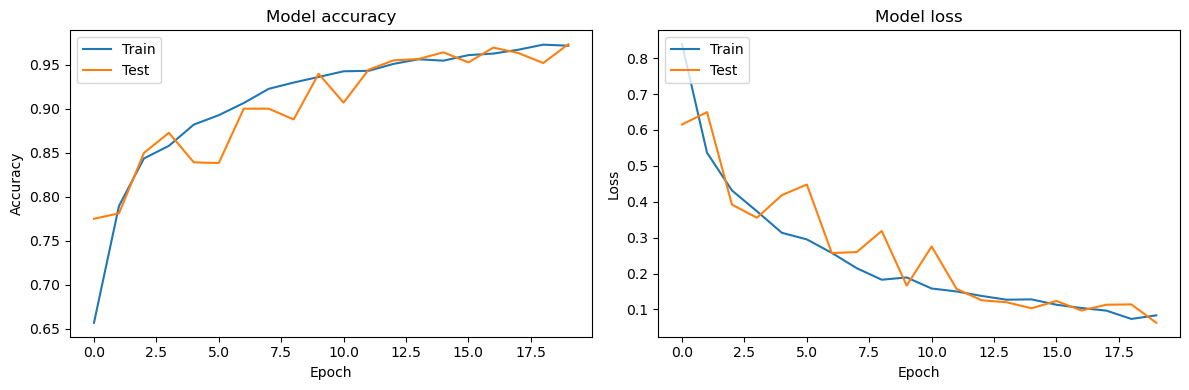

41/41 [==============================] - 13s 297ms/step - loss: 0.0629 - accuracy: 0.9733
Test Accuracy: 97.33%
41/41 [==============================] - 12s 298ms/step

Classification Report:
               precision    recall  f1-score   support

      glioma       0.20      0.19      0.20       300
  meningioma       0.21      0.21      0.21       306
     notumor       0.31      0.31      0.31       405
   pituitary       0.25      0.25      0.25       300

    accuracy                           0.25      1311
   macro avg       0.24      0.24      0.24      1311
weighted avg       0.25      0.25      0.25      1311


Confusion Matrix:
 [[ 58  73  96  73]
 [ 74  64  94  74]
 [ 90 105 126  84]
 [ 66  64  95  75]]


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Prepare Data
# No specific code needed for this step if your data is already organized into folders.

# Step 2: Load Data and Prepare Training and Testing Data
train_dir = 'Training'
test_dir = 'brain_'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # assuming multiple classes (change accordingly)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 3: Build the Model Architecture (CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (adjust based on your data)

# Step 4: Compilation of the Model and Pre-training
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Model Training
epochs = 20
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Step 6: Model Visualizations (Graphs to see model performance)
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Step 7: Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Step 8: Generate Predictions and Display Metrics
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Display classification report and confusion matrix
class_labels = list(train_generator.class_indices.keys())
print('\nClassification Report:\n', classification_report(test_generator.classes, y_pred, target_names=class_labels))
print('\nConfusion Matrix:\n', confusion_matrix(test_generator.classes, y_pred, labels=np.arange(len(class_labels))))
